# 📊 Data Exploration - SemEval 2026 Task 13

**Goal:** Understand the dataset and find patterns in human vs AI-generated code

**Level:** ⭐ Beginner (30-60 minutes)

**What you'll learn:**
- Load and explore parquet files
- Calculate basic statistics
- Create visualizations
- Identify patterns in the data

## 1. Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries loaded!")
print(f"🔒 Random seed: {SEED}")

✅ Libraries loaded!
🔒 Random seed: 42


## 2. Load Data

In [3]:
# Load training data
train_df = pd.read_parquet('../data/train_A.parquet')
val_df = pd.read_parquet('../data/validation_A.parquet')

print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"\nColumns: {list(train_df.columns)}")

# Show first few rows
train_df.head()

Training samples: 450000
Validation samples: 50000

Columns: ['code', 'generator', 'label', 'language']


,code,generator,label,language
0,return code only return code only\nreturn code...,codellama/CodeLlama-7b-hf,1,Python
1,"import math\n(a, aa, b, bb) = map(float, input...",human,0,Python
2,print (str(num)[-1])\n\n\ndef natLog(i):\n ...,codellama/CodeLlama-7b-hf,1,Python
3,python\ndef unusual_sort(arr):\n # Separate...,microsoft/Phi-3-medium-4k-instruct,1,Python
4,"from math import ceil\n(hh, mm) = list(map(int...",human,0,Python


## 3. Basic Statistics

Class Distribution:
label
1    235373
0    214627
Name: count, dtype: int64

Balance: label
1    0.523051
0    0.476949
Name: proportion, dtype: float64


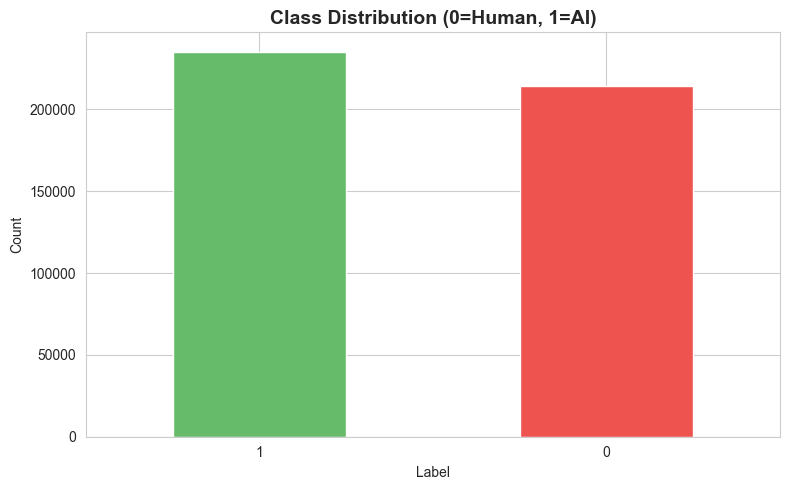

In [4]:
# Class distribution
print("Class Distribution:")
print(train_df['label'].value_counts())
print(f"\nBalance: {train_df['label'].value_counts(normalize=True)}")

# Visualize
plt.figure(figsize=(8, 5))
train_df['label'].value_counts().plot(kind='bar', color=['#66bb6a', '#ef5350'])
plt.title('Class Distribution (0=Human, 1=AI)', fontsize=14, fontweight='bold')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 4. Code Length Analysis

In [5]:
# Add length features
train_df['code_length'] = train_df['code'].str.len()
train_df['num_lines'] = train_df['code'].str.count('\n') + 1

# Statistics by class
print("Code Length Statistics:")
print(train_df.groupby('label')['code_length'].describe())
print("\nNumber of Lines Statistics:")
print(train_df.groupby('label')['num_lines'].describe())

Code Length Statistics:
          count         mean          std  min    25%    50%     75%       max
label                                                                         
0      214627.0   596.404749  1417.073823  0.0  205.0  319.0   546.0  121296.0
1      235373.0  1052.324302   893.346219  1.0  370.0  727.0  1494.0   11964.0

Number of Lines Statistics:
          count       mean        std  min   25%   50%   75%     max
label                                                               
0      214627.0  32.649662  83.242046  1.0  12.0  17.0  28.0  3775.0
1      235373.0  39.880216  34.812086  1.0  16.0  28.0  51.0   298.0


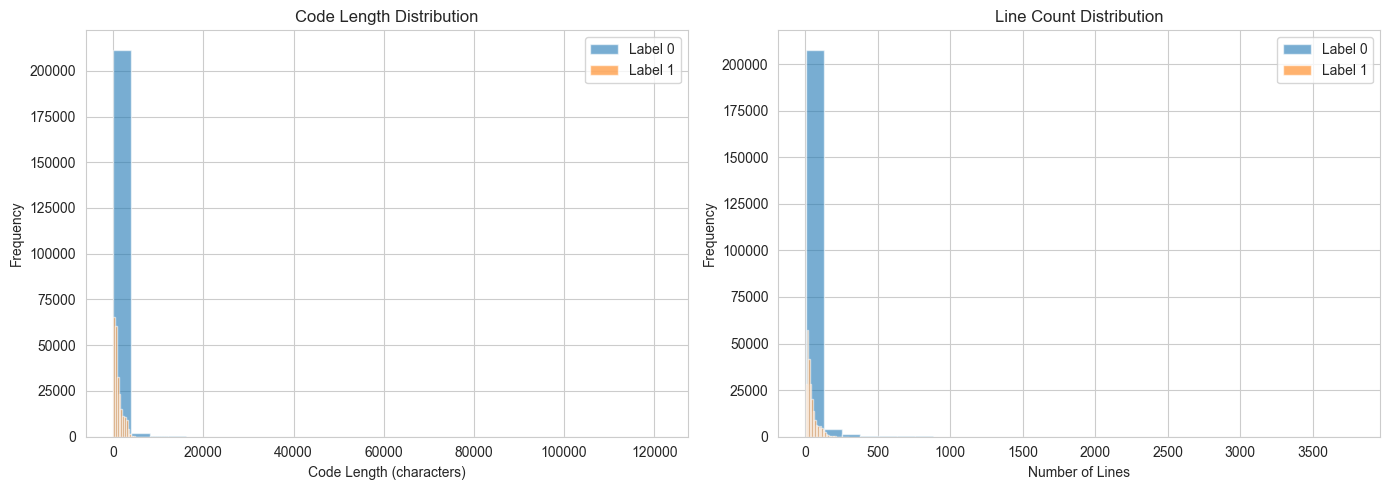

In [6]:
# Visualize distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Code length
for label in [0, 1]:
    data = train_df[train_df['label'] == label]['code_length']
    axes[0].hist(data, bins=30, alpha=0.6, label=f'Label {label}')
axes[0].set_xlabel('Code Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Code Length Distribution')
axes[0].legend()

# Number of lines
for label in [0, 1]:
    data = train_df[train_df['label'] == label]['num_lines']
    axes[1].hist(data, bins=30, alpha=0.6, label=f'Label {label}')
axes[1].set_xlabel('Number of Lines')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Line Count Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()

## 5. Sample Code Inspection

In [7]:
# Show example human code
print("=" * 60)
print("EXAMPLE: Human-Written Code (Label 0)")
print("=" * 60)
human_sample = train_df[train_df['label'] == 0].iloc[0]['code']
print(human_sample)

print("\n" + "=" * 60)
print("EXAMPLE: AI-Generated Code (Label 1)")
print("=" * 60)
ai_sample = train_df[train_df['label'] == 1].iloc[0]['code']
print(ai_sample)

EXAMPLE: Human-Written Code (Label 0)
import math
(a, aa, b, bb) = map(float, input().split())
A = math.sqrt(abs(a - b) ** 2 + abs(aa - bb) ** 2)
print(A)


EXAMPLE: AI-Generated Code (Label 1)
return code only return code only
return code output = str(int(s.count("a")) * 2 + 1)
return code output += str(int(s.count("b")) * 3)
return code output += str(int(s.count("c")) * 5)
for objec in "defg":
return code output += str(len(s.count(objec)))
else:
return code outpu
return code code output = str(int(s.count("a")) * 2 + 1)
return code code output += str(int(s.count("b")) * 3)
return code code output += str(int(s.count("c")) * 5)
for objec in "defg":
return code code output += str(len(s.count(objec)))
else:
return code variablediff = int(float(s.count("a")) / len(s) * 2 + int(float(s.count("b")) / len(s) * 3 + int(float(s.count("c")) / len(s) * 5 +
return code int(sum(float(s.count(ch)) / len(s) for ch in "defg")

return code for characa in s:
if characa in "defg":
return code variables.a

## 6. Your Turn! 🎯

**Tasks to try:**
1. Calculate average word length for human vs AI code
2. Count frequency of common keywords (def, class, if, for)
3. Analyze comment patterns (lines starting with #)
4. Create more visualizations

**Add your code below:**

In [8]:
# Your exploration code here!
def word_length():
    '''
    Calculate average word length for human vs AI code

    Returns:  
        tuple: (human_code, ai_code)  
    '''
    train_df['word_length'] = train_df['code'].str.split().str.len()
    
    human_code = train_df[train_df['label'] == 0]['word_length'].mean()
    ai_code = train_df[train_df['label'] == 1]['word_length'].mean()
    print(f"Human code average word length: {human_code:.2f}")
    print(f"AI code average word length: {ai_code:.2f}")
    
    # Visualize distributions
    plt.figure(figsize=(8, 5))
    
    for label in [0, 1]:
        data = train_df[train_df['label'] == label]['word_length']
        plt.hist(data, bins=30, alpha=0.6, label=f'Label {label}')
    plt.xlabel('Word Count per Code Sample')
    plt.ylabel('Frequency')
    plt.title('Word Count Distribution')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return human_code, ai_code

Total Keyword Frequency per Code Sample
          count      mean        std  min  25%  50%   75%    max
label                                                           
0      214627.0  6.939271  10.684322  0.0  3.0  5.0   8.0  609.0
1      235373.0  9.235630   8.851042  0.0  3.0  6.0  12.0  221.0


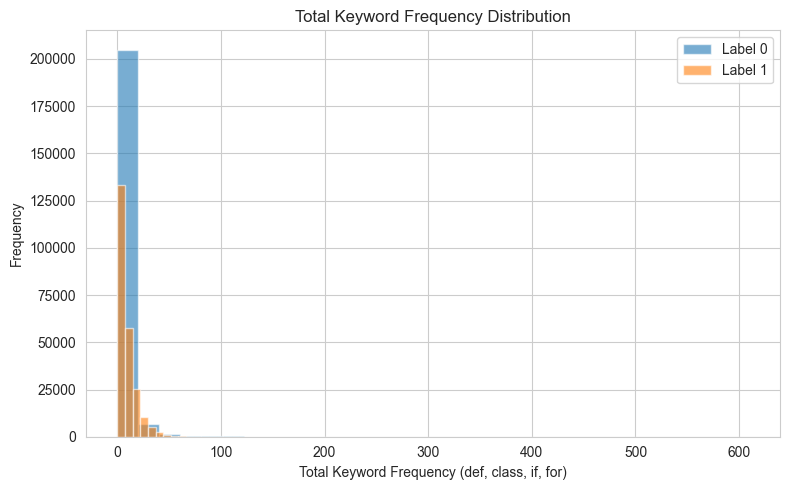

,code,generator,label,language,code_length,num_lines,total_keyword_freq
0,return code only return code only\nreturn code...,codellama/CodeLlama-7b-hf,1,Python,1338,29,13
1,"import math\n(a, aa, b, bb) = map(float, input...",human,0,Python,117,5,0
2,print (str(num)[-1])\n\n\ndef natLog(i):\n ...,codellama/CodeLlama-7b-hf,1,Python,605,26,5
3,python\ndef unusual_sort(arr):\n # Separate...,microsoft/Phi-3-medium-4k-instruct,1,Python,1298,31,6
4,"from math import ceil\n(hh, mm) = list(map(int...",human,0,Python,341,14,3
...,...,...,...,...,...,...,...
449995,def get_query1(p):\n if len(p) == 0:\n ...,Qwen/Qwen2.5-Coder-7B,1,Python,327,18,6
449996,"(N, M) = map(int, input().split())\ndp = [floa...",human,0,Python,370,18,5
449997,"python\ndef will_pipe_burst(m, Tc, Th):\n #...",microsoft/Phi-3.5-mini-instruct,1,Python,376,12,3
449998,python\ndef can_reduce_to_one(a):\n unique_...,microsoft/Phi-3-small-8k-instruct,1,Python,457,20,4


In [9]:

KEYWORDS = ['def', 'class', 'if', 'for']

def keyword_frequency():
    '''
    Calculate total frequency of all common keywords (def, class, if, for) per code sample.
    Compares the total keyword frequency between human and AI code samples.

    Returns:  
        DataFrame: train_df with added 'total_keyword_freq' column
    '''
    train_df['total_keyword_freq'] = 0
    
    for keyword in KEYWORDS:
        keyword_counts = train_df['code'].str.count(keyword)
        train_df['total_keyword_freq'] += keyword_counts
    
    human_stats = train_df[train_df['label'] == 0]['total_keyword_freq']
    ai_stats = train_df[train_df['label'] == 1]['total_keyword_freq']

    print("Total Keyword Frequency per Code Sample")
    print(train_df.groupby('label')['total_keyword_freq'].describe())
    
    # Visualize distributions
    plt.figure(figsize=(8, 5))
    
    for label in [0, 1]:
        data = train_df[train_df['label'] == label]['total_keyword_freq']
        plt.hist(data, bins=30, alpha=0.6, label=f'Label {label}')
    plt.xlabel('Total Keyword Frequency (def, class, if, for)')
    plt.ylabel('Frequency')
    plt.title('Total Keyword Frequency Distribution')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return train_df

keyword_frequency()

Comment Analysis Statistics (Human vs AI):
          count      mean       std  min  25%  50%  75%    max
label                                                         
0      214627.0  0.292768  3.218509  0.0  0.0  0.0  0.0  418.0
1      235373.0  1.601479  3.178639  0.0  0.0  0.0  2.0  145.0
          count      mean        std  min  25%  50%  75%    max
label                                                          
0      214627.0  0.343970   3.429233  0.0  0.0  0.0  0.0  384.0
1      235373.0  4.087466  14.231633  0.0  0.0  0.0  5.0  867.0


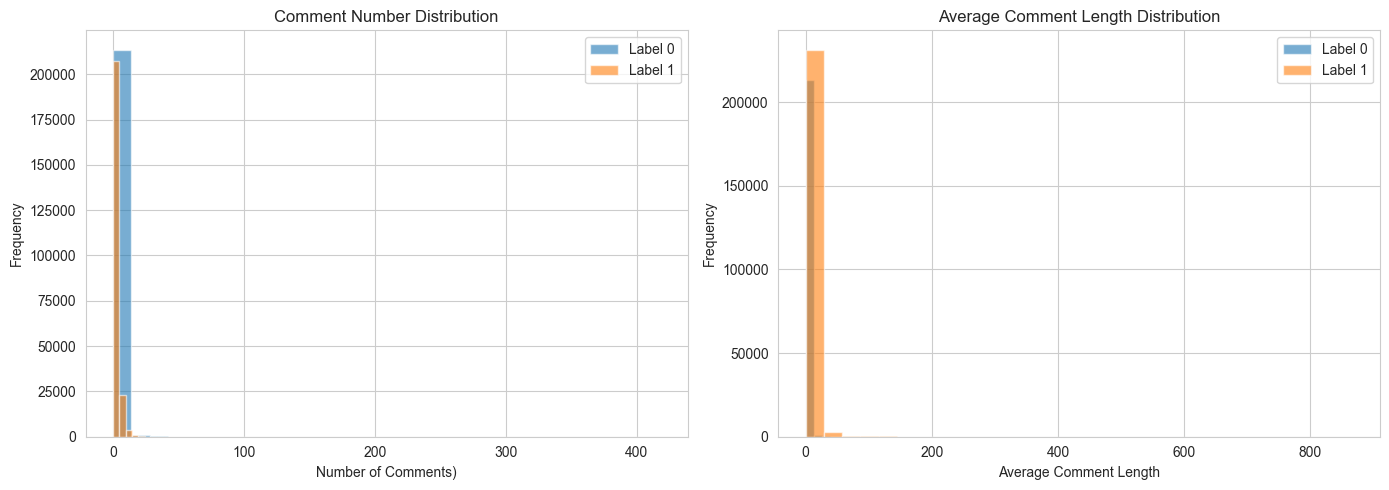

In [10]:

def comment_patterns():
    '''
    Count the number of comments in each code sample and calculate 
    the average length of comments for human vs AI code.
    '''
    def count_comments(code):
        lines = code.split('\n')
        comment_count = 0
        in_comment_block = False
        
        for line in lines:
            is_comment_line = line.strip().startswith('#')
            if is_comment_line and not in_comment_block:
                comment_count += 1
                in_comment_block = True
            elif not is_comment_line:
                # End of comment block
                in_comment_block = False
        
        return comment_count
    
    # Calculate average comment length (word count) for each code sample
    def avg_comment_length(code):
        lines = code.split('\n')
        comment_blocks = []
        current_comment = []
        
        for line in lines:
            if line.strip().startswith('#'):
                current_comment.append(line.strip().lstrip('#'))
            else:
                if current_comment:
                    comment_blocks.append(' '.join(current_comment))
                    current_comment = []
        
        if current_comment:
            comment_blocks.append(' '.join(current_comment))
        
        if len(comment_blocks) == 0:
            return 0 
        
        comment_word_counts = [len(comment.split()) for comment in comment_blocks]
        return sum(comment_word_counts) / len(comment_word_counts) if comment_word_counts else 0
    
    train_df['num_comments'] = train_df['code'].apply(count_comments)
    train_df['avg_comment_length'] = train_df['code'].apply(avg_comment_length)
    
    print("Comment Analysis Statistics (Human vs AI):")
    print(train_df.groupby('label')['num_comments'].describe())
    print(train_df.groupby('label')['avg_comment_length'].describe())
    return train_df

comment_patterns()
# Visualize distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Code length
for label in [0, 1]:
    data = train_df[train_df['label'] == label]['num_comments']
    axes[0].hist(data, bins=30, alpha=0.6, label=f'Label {label}')
axes[0].set_xlabel('Number of Comments)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Comment Number Distribution')
axes[0].legend()

# Number of lines
for label in [0, 1]:
    data = train_df[train_df['label'] == label]['avg_comment_length']
    axes[1].hist(data, bins=30, alpha=0.6, label=f'Label {label}')
axes[1].set_xlabel('Average Comment Length')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Average Comment Length Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()




## 7. Key Findings

**Document your observations:**
- What patterns did you notice?
- Are there clear differences between human and AI code?
- What features might be useful for classification?

**Your notes:**
- 
- 
- 

---

## ✅ Next Steps

1. **Share your findings** - Open a PR with this notebook
2. **Try notebook 02** - Feature analysis
3. **Propose new features** - Based on what you discovered

**Great job exploring the data!** 🎉